# Targets with low accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
af2_resolved_path = score_dir / 'af2_confidence_resolved.csv.gz'
af2_resolved_df = pd.read_csv(af2_resolved_path, index_col=0)
label_df = pd.merge(label_df, af2_resolved_df, on=['Target', 'Model'])
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,pTM_resolved,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,...,0.908,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,...,0.910,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,...,0.904,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,...,0.905,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,...,0.906,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187595,model_5_seed_1_rec_5_ens_1,0.987,0.971,0.873,NaN,NaN,0.964,NaN,0.054,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187596,model_5_seed_1_rec_6_ens_1,0.987,0.971,0.874,NaN,NaN,0.964,NaN,0.045,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187597,model_5_seed_1_rec_7_ens_1,0.987,0.971,0.874,NaN,NaN,0.963,NaN,0.044,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187598,model_5_seed_1_rec_8_ens_1,0.987,0.970,0.874,NaN,NaN,0.964,NaN,0.056,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False


## Targets with low maximum GDT_TS

In [4]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets_low_max_gdtts = gdtts_max_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,pTM_resolved,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_2_seed_1_rec_10_ens_8,0.243,0.259,0.146,0.304,0.324,0.334,NaN,2.304,model_2,...,NaN,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
6BJG_A,model_2_seed_1_rec_8_ens_1,0.481,0.448,0.306,0.397,0.399,0.519,NaN,1.297,model_2,...,NaN,6BJG_A,2.290,2021-03-17T00:00:00Z,>6bjg_A mol:protein length:172 RNA silencing ...,MERAIQGNDTREQANGERWDGGSGGITSPFKLPDESPSWTEWRLYN...,172,8,6,True
7EL1_E,model_3_seed_0_rec_2_ens_8,0.487,0.474,0.347,0.415,0.415,0.455,NaN,4.775,model_3,...,NaN,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
6NEK_A,model_2_ptm_seed_0_rec_1_ens_1,0.668,0.680,0.579,0.770,0.769,0.832,0.700,18.760,model_2_ptm,...,0.697,6NEK_A,1.630,2019-12-25T00:00:00Z,>6nek_A mol:protein length:93 Consensus PDZ d...,MGWEELTVELEKDGEGLGFSLGDGGIFVSSVVPGGPAARAGRLRVG...,93,18,1,True
6NNW_A,model_2_ptm_seed_1_rec_10_ens_1,0.760,0.695,0.538,0.654,0.644,0.739,0.665,0.204,model_2_ptm,...,0.625,6NNW_A,1.700,2019-07-24T00:00:00Z,>6nnw_A mol:protein length:208 Tetronasin,SHMTTSIDPTTPLTYNPVIDALVGSWRQIIDADYSADDTRLPDLAV...,208,4,4,False
6RO0_B,model_5_ptm_seed_0_rec_5_ens_1,0.823,0.712,0.506,0.773,0.766,0.741,0.639,1.480,model_5_ptm,...,0.647,6RO0_B,2.135,2018-12-19T00:00:00Z,>6ro0_B mol:protein length:226 Islet-activati...,MPIDRKTLCHLLSVLPLALLGSHVARASTPGIVIPPQEQITQHGSP...,226,4,4,False
7N50_A,model_1_ptm_seed_1_rec_6_ens_8,0.828,0.712,0.503,NaN,NaN,0.746,0.755,0.293,model_1_ptm,...,0.726,7N50_A,1.500,2021-08-11T00:00:00Z,>7n50_A mol:protein length:259 Gasdermin,SNCSRDTGDELMAALLAEGINLILPPRDNIAPGDLIIADPQGGARL...,259,1,1,False
6BS3_B,model_2_seed_0_rec_1_ens_1,0.857,0.724,0.555,0.758,0.751,0.792,NaN,38.987,model_2,...,NaN,6BS3_B,2.300,2018-05-02T00:00:00Z,>6bs3_B mol:protein length:394 Anion transporter,MSVTPKTLDMGAILADTSNRVVVCCGAGGVGKTTTAAALALRAAEY...,394,3,3,False
6W40_A,model_3_ptm_seed_0_rec_2_ens_8,0.748,0.742,0.575,0.648,0.652,0.884,0.783,0.242,model_3_ptm,...,0.759,6W40_A,2.497,2020-05-20T00:00:00Z,>6w40_A mol:protein length:120 DENOVO NTF2,GDEEEKHLRDMMEIVIKLFMTGDWDAFHEMADPDVKFQVDVGDKHI...,120,2,2,False


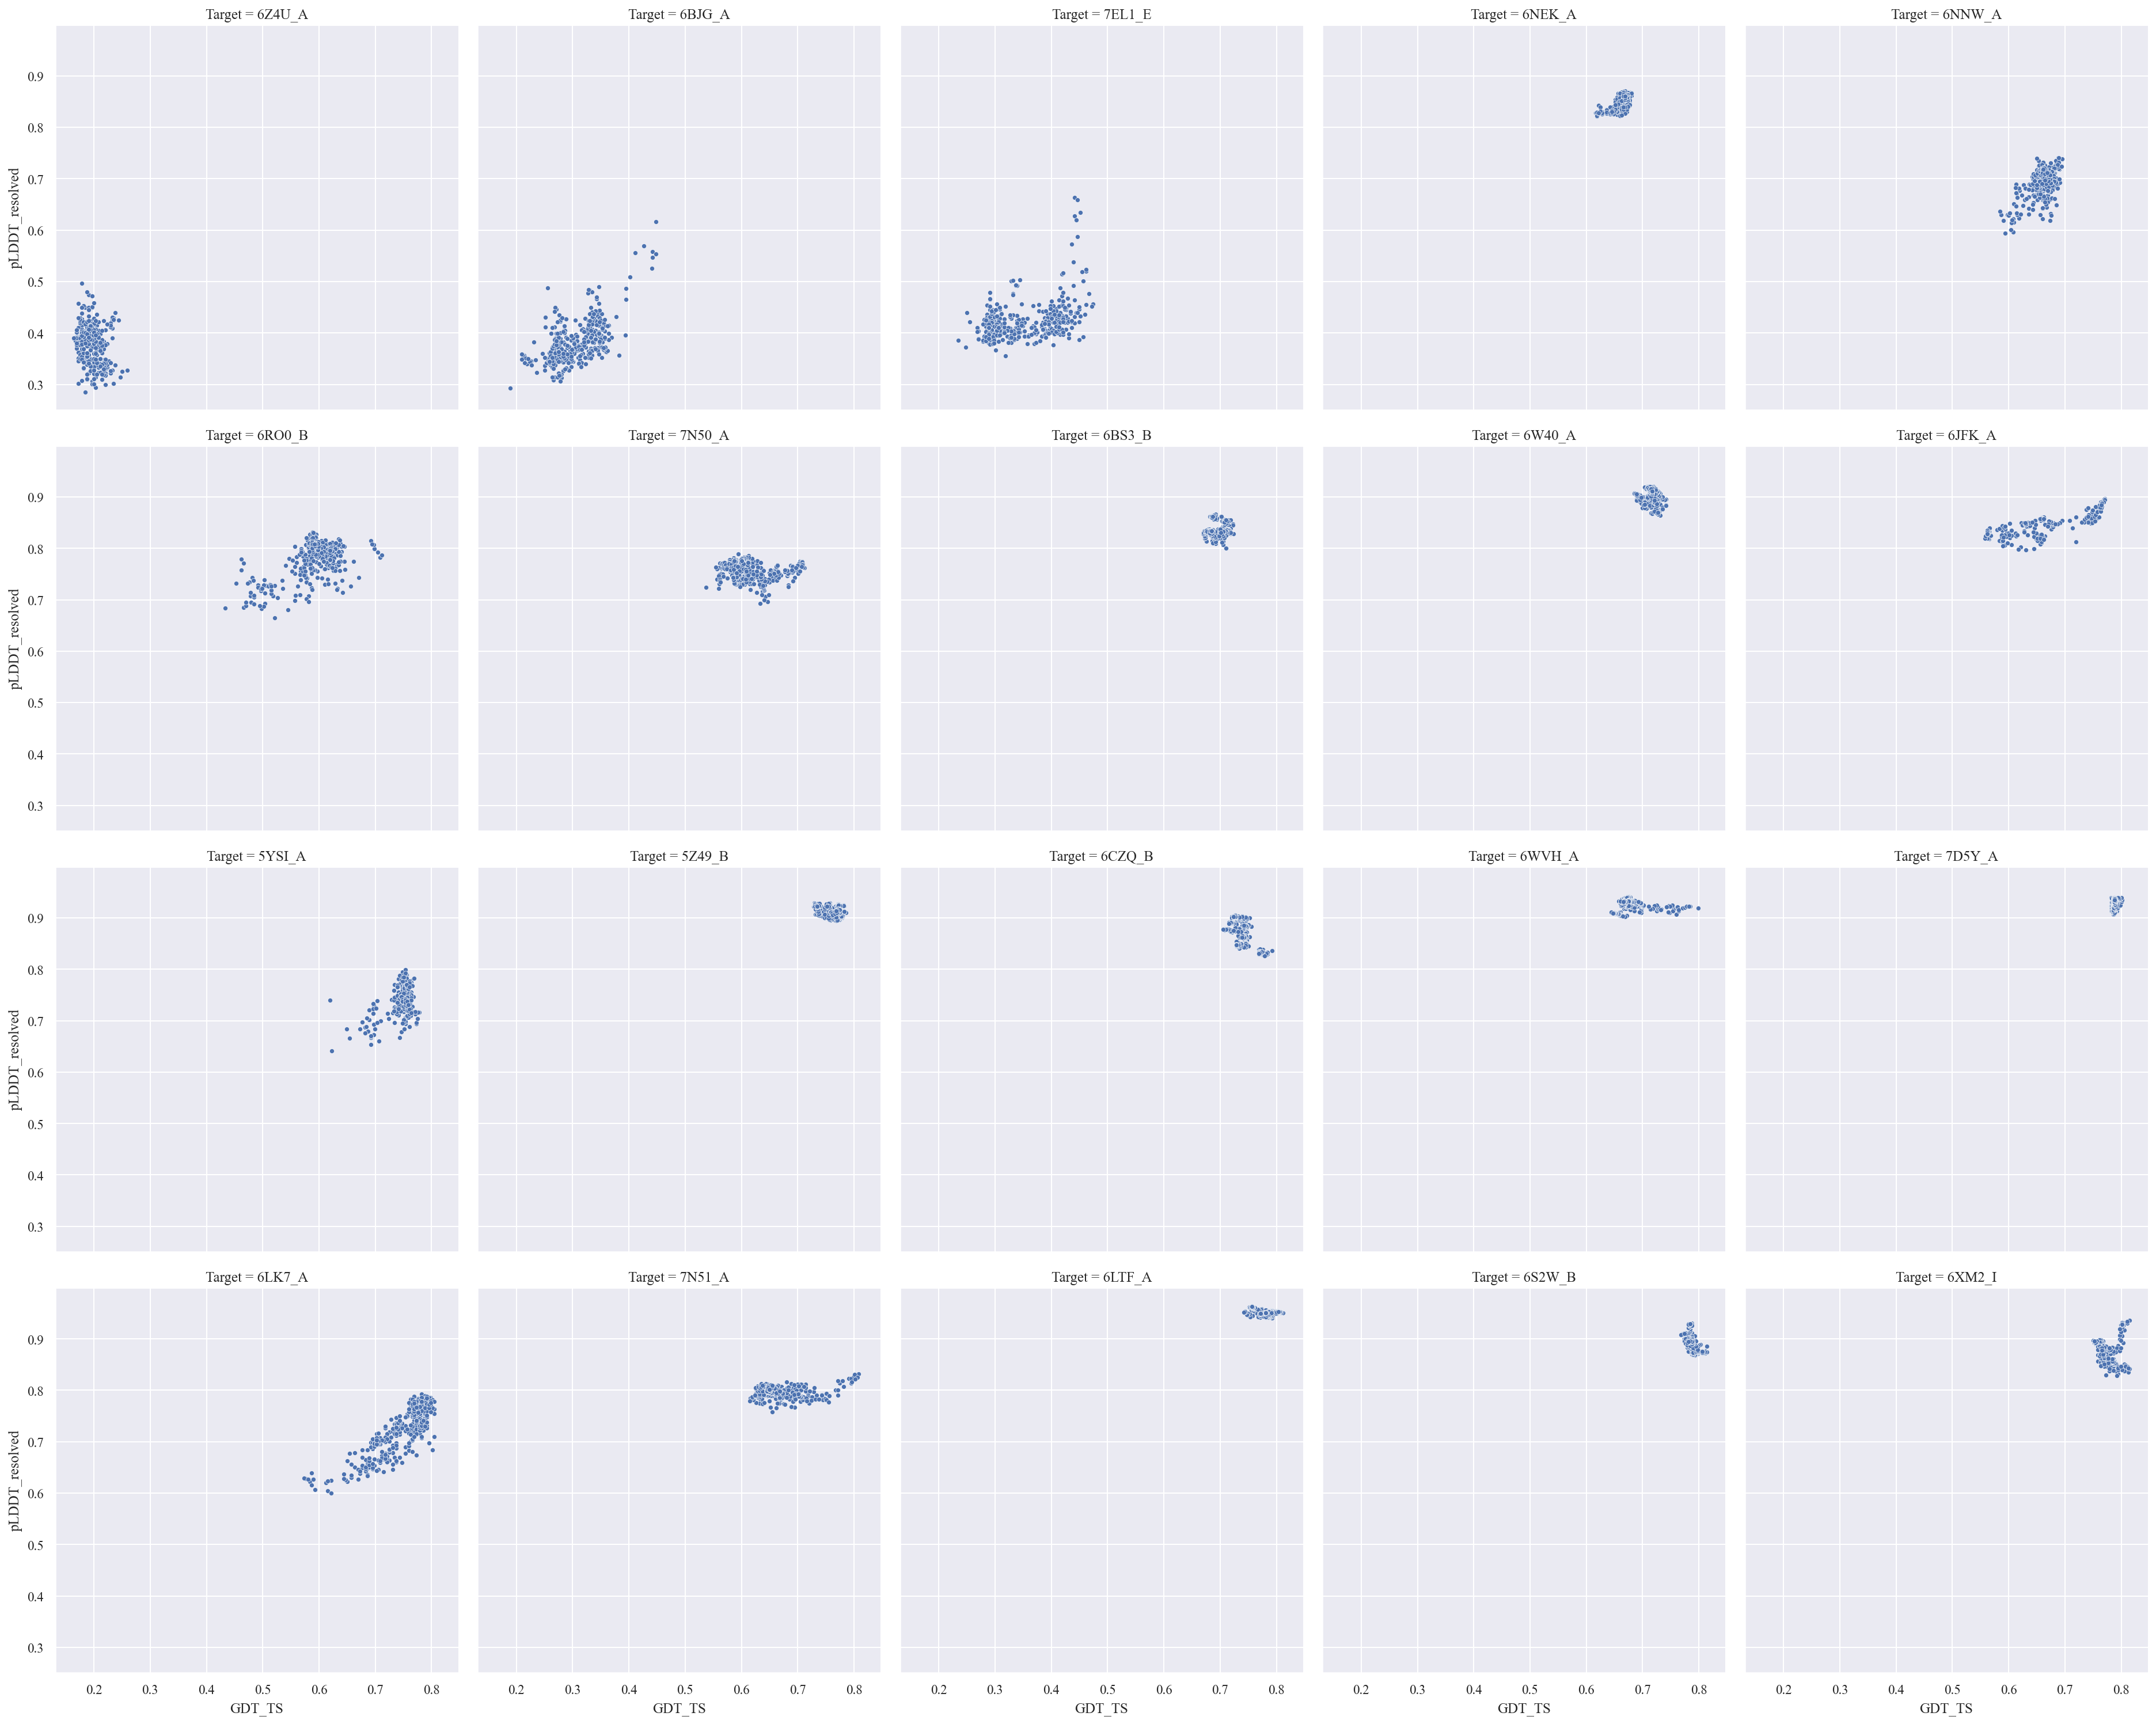

In [5]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pLDDT_resolved'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

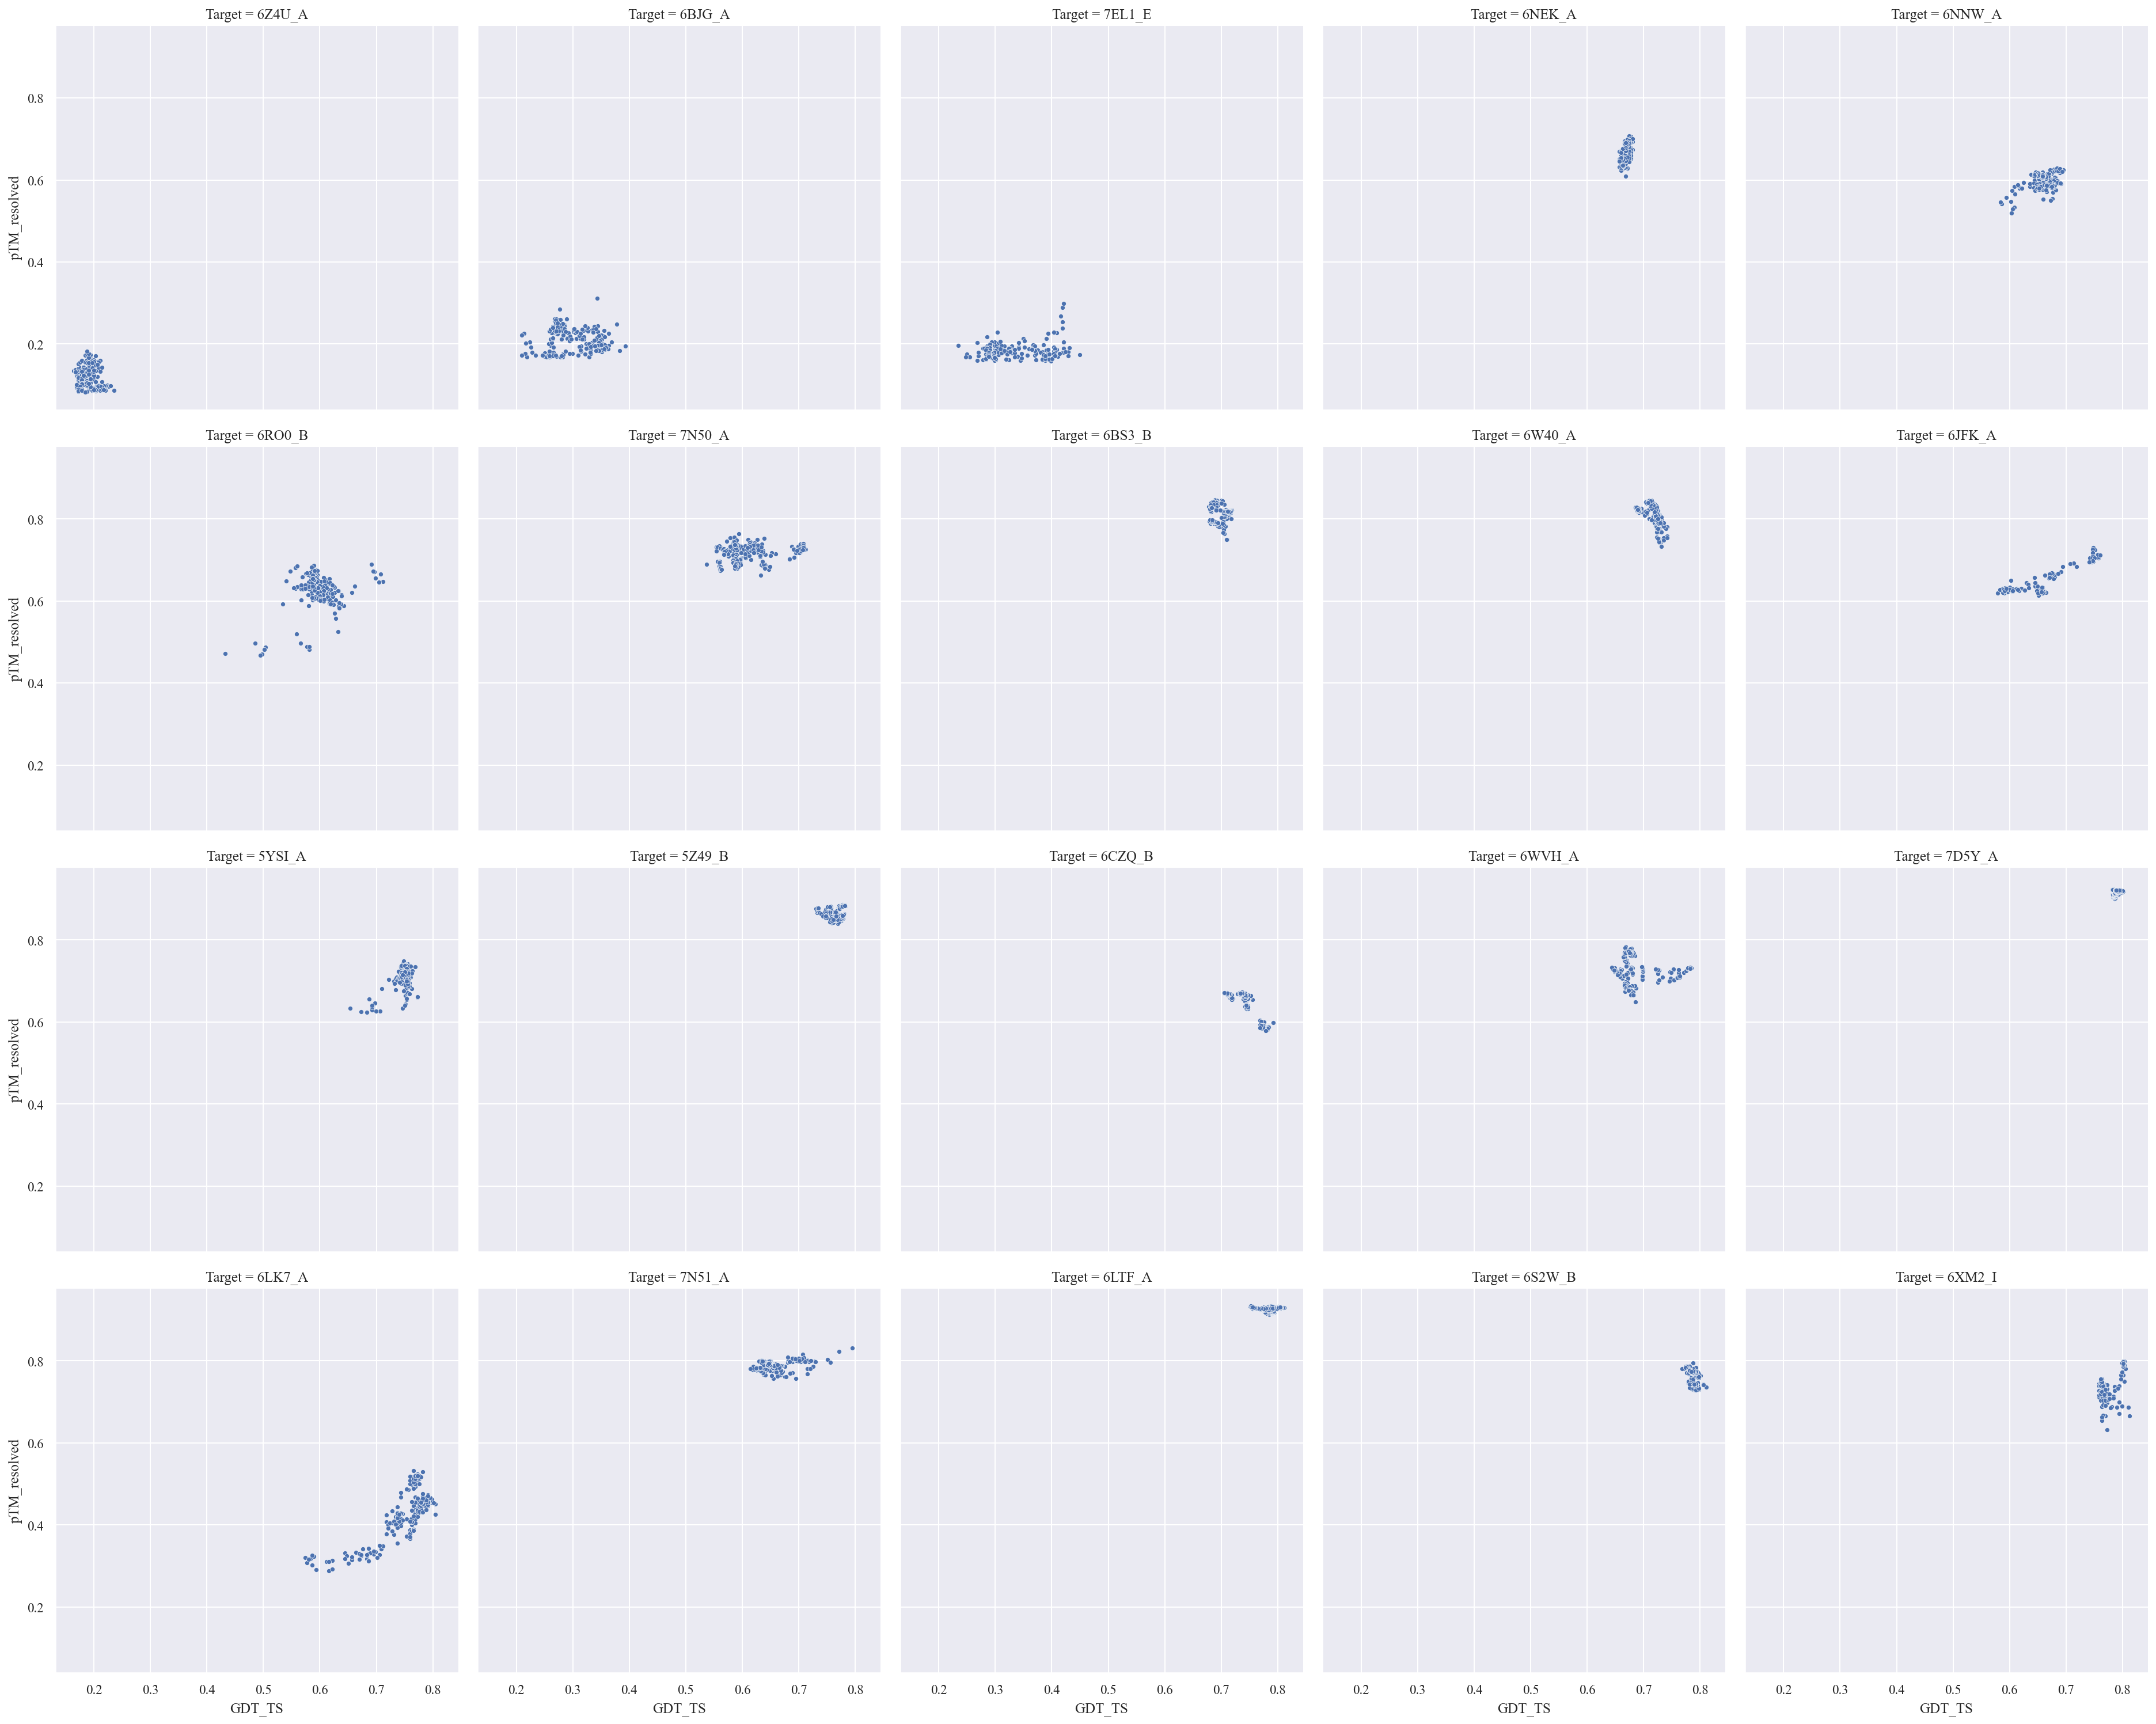

In [6]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pTM_resolved'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

## Targets with a low GDT_TS model

In [7]:
label = 'GDT_TS'
target_num = 20
gdtts_min_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmin()]).sort_values(label)
display(gdtts_min_df.head(target_num))
sample_targets_with_low_gdtts = gdtts_min_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,pTM_resolved,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_1_ptm_seed_0_rec_6_ens_8,0.162,0.164,0.110,0.260,0.272,0.397,0.260,1.743,model_1_ptm,...,0.135,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
6BJG_A,model_3_seed_0_rec_1_ens_1,0.221,0.189,0.129,0.214,0.229,0.297,NaN,35.305,model_3,...,NaN,6BJG_A,2.290,2021-03-17T00:00:00Z,>6bjg_A mol:protein length:172 RNA silencing ...,MERAIQGNDTREQANGERWDGGSGGITSPFKLPDESPSWTEWRLYN...,172,8,6,True
7EL1_E,model_2_ptm_seed_1_rec_1_ens_1,0.233,0.235,0.161,0.275,0.278,0.383,0.281,20.833,model_2_ptm,...,0.196,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
5VTL_A,model_1_ptm_seed_1_rec_6_ens_1,0.428,0.356,0.283,0.451,0.459,0.490,0.470,5.194,model_1_ptm,...,0.391,5VTL_A,1.830,2018-08-08T00:00:00Z,>5vtl_A mol:protein length:210 Tb427.07.360- ...,QNTVSHVSAACLFSEALHGIPFGVKVLKALAAANVSDASKAREGCQ...,210,1,1,False
6EDE_A,model_4_ptm_seed_0_rec_9_ens_1,0.508,0.421,0.302,0.619,0.633,0.758,0.751,1.878,model_4_ptm,...,0.793,6EDE_A,1.556,2020-07-29T00:00:00Z,>6ede_A mol:protein length:203 Probable RNA 2...,MGSSHHHHHHSSGLVPRGSHMMVLIDYSKLSKEVAYALRHAPWEYG...,203,1,1,False
6E3A_A,model_4_ptm_seed_1_rec_3_ens_1,0.510,0.425,0.310,0.622,0.636,0.793,0.798,3.662,model_4_ptm,...,0.759,6E3A_A,1.400,2018-10-10T00:00:00Z,>6e3a_A mol:protein length:182 Probable RNA 2...,MVLIDYSKLSKEVAYALRHAPWEYGLELDAEGWVDINQLLSSLHEC...,182,1,1,False
6EXU_A,model_2_seed_0_rec_2_ens_1,0.432,0.427,0.310,NaN,NaN,0.641,NaN,2.086,model_2,...,NaN,6EXU_A,1.410,2020-04-08T00:00:00Z,>6exu_A mol:protein length:116 Switch-activat...,LSPSSSPAKAQRTHLSLEEKIKLMRLVVRHKHELVDRKTSEFYAKI...,116,3,2,True
6RO0_B,model_5_ptm_seed_0_rec_1_ens_8,0.493,0.433,0.311,0.601,0.597,0.651,0.485,36.659,model_5_ptm,...,0.472,6RO0_B,2.135,2018-12-19T00:00:00Z,>6ro0_B mol:protein length:226 Islet-activati...,MPIDRKTLCHLLSVLPLALLGSHVARASTPGIVIPPQEQITQHGSP...,226,4,4,False
6R6U_A,model_1_ptm_seed_0_rec_2_ens_1,0.531,0.482,0.401,NaN,NaN,0.851,0.819,5.857,model_1_ptm,...,0.799,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False


In [8]:
set(sample_targets_with_low_gdtts) - set(sample_targets_low_max_gdtts)

{'5VTL_A',
 '6E3A_A',
 '6EDE_A',
 '6EXU_A',
 '6HLK_A',
 '6N0S_A',
 '6R6U_A',
 '6TJB_B',
 '6XGT_E'}

## Targets with low GDT_TS and high mean-LDDT

In [9]:
df.query('GDT_TS < 0.6 and Mean_LDDT > 0.8')['Target'].unique()

array(['6EDE_A', '6XGT_E', '6E3A_A'], dtype=object)